In [1]:
# !pip install newsapi-python
# !pip install textblob

In [2]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='********************************')

# /v2/everything
all_articles = newsapi.get_everything(q='GOOG',
                                      language='en',
                                      sort_by='relevancy',
                                      page=1)

# Extract the news articles from the response
news = all_articles["articles"]

# Store the news titles in a list
news_list = [news_item["title"] for news_item in news]


In [3]:
from textblob import TextBlob

# Function to perform sentiment analysis
def sentiment_analysis(news):
    analysis = TextBlob(news)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

# Perform sentiment analysis on each news article
sentiments = [sentiment_analysis(news) for news in news_list]


In [4]:
import pandas as pd

# Create a DataFrame with the news articles and their sentiments
df = pd.DataFrame({"news": news_list, "sentiment": sentiments})


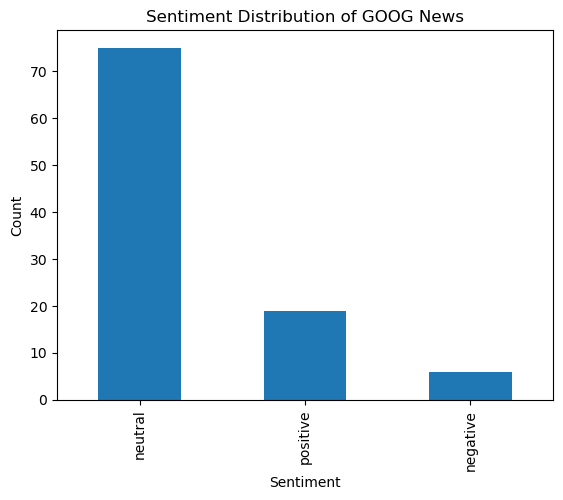

In [5]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
df["sentiment"].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution of GOOG News")
plt.show()


In [6]:
from textblob import TextBlob

# Function to perform sentiment analysis
def sentiment_analysis(news):
    analysis = TextBlob(news)
    return analysis.sentiment.polarity

# Perform sentiment analysis on each news article
scores = [sentiment_analysis(news) for news in news_list]


In [7]:
# Calculate the average score
average_score = sum(scores) / len(scores)

# Print the average score
print("Average score:", average_score)


Average score: 0.05691006493506493
